# Economic Effects of a Year-Long Lockdown



### 1. Import those data from GDP_cycle.csv.  This is a list of 292 numbers

### 2. Plot and make a histogram with five bins.  Each bin will be a state.  The lowest bin is the Covid state; it only has one observation.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('GDP_cycle.csv')

count in each state [  1.   9.  43. 172.  67.]


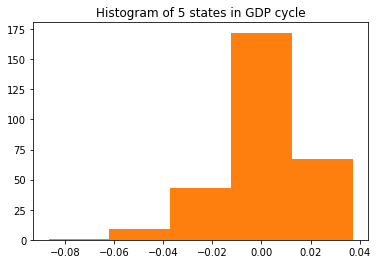

In [12]:

(n, bins, hist) = plt.hist(df['GDP cycle'],bins = 5)
plt.title('Histogram of 5 states in GDP cycle')
print('count in each state',plt.hist(df['GDP cycle'],bins = 5)[0])

### 3. Classify the states. 

In [13]:
df = df.rename(columns = {'Unnamed: 0':'Date'})
bins #we'll be using these bin borders to classify

array([-0.08663752, -0.06186674, -0.03709595, -0.01232517,  0.01244561,
        0.0372164 ])

In [14]:
means = pd.DataFrame(np.zeros((5,1)))
df['state'] = 6

for i in range(0,292):
    if df.loc[i,'GDP cycle'] < -0.06186674:
        df.loc[i,'state'] = 0
    if df.loc[i,'GDP cycle'] > -0.06186674 and df.loc[i,'GDP cycle'] < -0.03709595:
        df.loc[i,'state'] = 1
    if df.loc[i,'GDP cycle'] > -0.03709595 and df.loc[i,'GDP cycle'] < -0.01232517:
        df.loc[i,'state'] = 2
    if df.loc[i,'GDP cycle'] > -0.01232517 and df.loc[i,'GDP cycle'] < 0.01244561:
        df.loc[i,'state'] = 3
    if df.loc[i,'GDP cycle'] > 0.01244561 and df.loc[i,'GDP cycle'] < 0.0372164:
        df.loc[i,'state'] = 4
#kind of an ugly way to classify them with the histogram bins but it works

## 4. Estimate the Markov matrix, and find its ergodic distribution  Report the long-run probability of being in a Covid state.

In [15]:
#I'm just going to do the same method I used in homework 4.
counts = np.zeros((5,5))
for i in range (1,292): #there are only 291 transitions.
    today = df.loc[i-1,'state'] #this just helps me visualize the loop easier. I could probably write this all in one line.
    tomorrow = df.loc[i,'state']
    counts[today,tomorrow] =  counts[today,tomorrow] + 1
counts

array([[  0.,   0.,   1.,   0.,   0.],
       [  0.,   5.,   4.,   0.,   0.],
       [  0.,   3.,  27.,  13.,   0.],
       [  1.,   1.,  11., 140.,  18.],
       [  0.,   0.,   0.,  19.,  48.]])

In [125]:
M = np.zeros((5,5))
for i in range (0,5):
    for j in range(0,5):
        M[i,j] = counts[i,j]/sum(counts[i,:])
M

array([[0.        , 0.        , 1.        , 0.        , 0.        ],
       [0.        , 0.55555556, 0.44444444, 0.        , 0.        ],
       [0.        , 0.06976744, 0.62790698, 0.30232558, 0.        ],
       [0.00584795, 0.00584795, 0.06432749, 0.81871345, 0.10526316],
       [0.        , 0.        , 0.        , 0.28358209, 0.71641791]])

In [151]:
def ergodic(m):
    """
    This code finds the ergodic distribution of a Markov matrix
    """
    n=m.shape[0] # number of rows
    T = 1000 # useful constant
    eps=0.0001 #useful constant
    if (m.shape[0] != m.shape[1]): #test for a square matrix
        return('Matrix is not square') 
    if (not (np.matmul(m,np.ones(n))==1).all()): #test row sums 
        return('This is not a Markov matrix')
    if( not ((m >= 0).all() and (m <= 1).all())): #test probabilities
        return('This is not a Markov matrix')
    m_long = np.linalg.matrix_power(m,T)
    if( not ((m_long > 0).all() and (m_long < 1).all())): #crude test for aperiodic and irreducible
        return('This matrix may not be both aperiodic and irreducible')
    w,v = np.linalg.eig(m.T) #Need the left eigenvector; that's why we transpose
    choose = (abs(w-1) < eps)
    m_long = v[:,choose]/sum(v[:,choose])  #Need to make the eigenvector into a probability vector.
    return(m_long)
ergodic(M).real

array([[0.00347858],
       [0.03130721],
       [0.14957891],
       [0.59483706],
       [0.22079824]])

In [18]:
consumption = np.zeros((5,1))
for i in range(0,5):
    consumption[i] = np.mean(df.loc[df['state'] == i,'GDP cycle'])

consumption = np.exp(consumption)

In [19]:
consumption

array([[0.91700943],
       [0.95784949],
       [0.97929425],
       [1.00027525],
       [1.01999697]])

### 6. Here's the asset pricing kernel.  Explain why the diagonal elements are all the same.  Explain also why the matrix is not symmetric.  Explain how the kernel depends upon the Markov matrix. 

In [20]:
K =np.array([[0.99241412, 0.90959066, 0.87019008, 0.83406807, 0.80212633],
    [1.08277913, 0.99241412, 0.94942589, 0.91001476, 0.87516454],
    [1.13180534, 1.03734877, 0.99241412, 0.95121852, 0.91479035],
    [1.18082183, 1.08227451, 1.03539382, 0.99241412, 0.95440831],
    [1.22784372, 1.12537212, 1.07662458, 1.03193337, 0.99241412]])


$$
K =
\left[
\begin{array}{c}
  \dfrac{\nabla U(c)}{\partial U/ \partial c_1 } \\
 \vdots \\
  \dfrac{\nabla U(c)}{\partial U/ \partial c_n } \\
\end{array}
\right]
=
\left[
\begin{array}{ccc}
 \beta \dfrac{u'(c_1)}{u'(c_1)} & \dots & \beta \dfrac{u'(c_n)}{u'(c_1)} \\
 \vdots & \vdots & \vdots \\
 \beta \dfrac{u'(c_1)}{u'(c_n)} & \dots & \beta \dfrac{u'(c_n)}{u'(c_n)} \\
\end{array}
\right]
$$
  

We can see that the diagonal elements of the matrix are determined by our discount factor times the ratio of marginal felicity with consumption in a state with itself. Thus, the diagonal of the pricing kernel should be our constant discount factor.  
  
The reason that the matrix is not symmetric is that the ratio of marginal felicity is flipped on the corresponding elements that would make the matrix symmetric. Understanding the Markov matrix as a representation of transitions from the row period to the column period, it is reasonable to assume that the transition from state A to state B is not necessarily going to be equal to the transition from state B to state A.
 

### 7. Here is an array of maturities [1, 2, 4, 8, 20, 40, 80, 120] in quarters.  Make a diagram with five yield curves.  Each line in your diagram should consist of a yield curve in a given state.

In [21]:
def pricing_T(M,K,R,T):
    """
    M is a markov matrix
    K is a pricing kernel
    R is a matrix of asset payouts.
    T is when these assets mature. They all mature at the same time.
    The asset returns are by column
    """
    if M.shape != K.shape:
        return('Markov matrix and pricing kernels are not conformable.')
    if M.shape[1] != R.shape[0]:
        return('Asset price matrix is not conformable.')
    M1=np.multiply(M,K) #element-by-elemnt multiplication
    P = np.matmul(np.linalg.matrix_power(M1,T), R)  
    #raise M1 to the T the right multiply by R
    return(P)

In [22]:
#I assume we're still using arrow securities
R = np.array([[1, 1, 0, 0, 0, 0],
             [1,0, 1, 0, 0, 0],
             [1, 0, 0, 1, 0, 0],
             [1,0, 0, 0, 1, 0],
            [1,0, 0, 0, 0, 1]])

#maturity in quarters.
T = [1, 2, 4, 8, 20, 40, 80, 120] 

In [23]:
gross_yield = [0 for i in range(len(T))] 


for i in range(len(T)):
    P = pricing_T(M,K,R,T[i])
    bond_price = (P[:,0])
    annualized_gross_yield = ((1/bond_price)**(4/T[i]))
    gross_yield[i] = annualized_gross_yield
gross_yield

[array([1.74398798, 1.11429043, 1.07057904, 1.02930281, 0.98564589]),
 array([1.36641025, 1.10463892, 1.06597612, 1.03041133, 0.99186945]),
 array([1.20242485, 1.0895209 , 1.05902254, 1.03041923, 1.00134681]),
 array([1.12028726, 1.07037581, 1.04981322, 1.03036039, 1.01200995]),
 array([1.06703084, 1.04856485, 1.03935906, 1.03061841, 1.02262149]),
 array([1.04884551, 1.03974492, 1.03515087, 1.03077153, 1.02675436]),
 array([1.03984811, 1.03532705, 1.03303722, 1.03084967, 1.02883896]),
 array([1.03686614, 1.03385856, 1.03233361, 1.03087572, 1.02953478])]

In [24]:
#transforming so that we can plot this easily

gy_state = [0 for i in range(5)] 

for j in range(5):
    state_yield = [0 for i in range(len(T))]
    for k in range(len(gross_yield)):
        state_yield[k] = gross_yield[k][j]
    gy_state[j] = state_yield
gy_state;

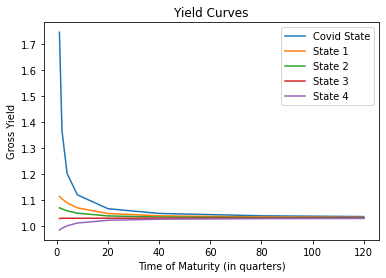

In [25]:
#plotting
x= T
y = gy_state
plt.plot(x,y[0], label = 'Covid State')
plt.plot(x,y[1], label = 'State 1')
plt.plot(x,y[2], label = 'State 2')
plt.plot(x,y[3], label = 'State 3')
plt.plot(x,y[4], label = 'State 4')

plt.title('Yield Curves')
plt.ylabel('Gross Yield')
plt.xlabel('Time of Maturity (in quarters)')
plt.legend()
plt.show()

### 8. Discuss whether an inverted yield curve conveys information about next period's state.  
The graph above shows us the relationship with gross yield and amount of time (in quarters) it takes for an asset to mature. Regarding information about the next period's state, we know that the ergodic distribution has the third state being the most likely state for us to be in. We can see the curve converging to 1.03 with all the other ones, so an inverted curve shows the direction, or more likely, state that we will be in next period.

### 9. The stock market is an asset that pays a dividend equal to the economy's consumption in each quarter.  Price the stock market in each state. 

In [26]:
# Prices a stock that pays time-varying dividends for T periods.
def pricing_stock(M,K,R,T):
    """
    M is a markov matrix
    K is a pricing kernel
    R is a matrix of asset payouts.  Its columns vary with time
    T is the end of the payout stream
    """
    n=M.shape[0] #number of states
    if M.shape != K.shape:
        return('Markov matrix and pricing kernels are not conformable.')
    if M.shape[1] != R.shape[0]:
        return('Asset price matrix is not conformable.')
    M1=np.multiply(M,K) #element-by-element multiplication
    p=np.zeros(n)
    for t in range(T):
        p += np.matmul(np.linalg.matrix_power(M1,t), R[:,t])  
    #raise M1 to the T the right multiply by t-th column of R
    # Then add them all up
    return(p)

In [53]:
T = 10000
R = consumption
R2 = R@np.ones((1,10*T)) 
stocks = pricing_stock(M,K,R2,T)
print(stocks)

[111.35143791 121.25877605 126.65910432 132.05857024 137.24231996]


### 10. The first row of the Markov matrix was (0, 0, 1, 0, 0). What is the expected duration of a lockdown for this matrix? Change the first row of the matrix so that it is (p, 0, 1-p, 0, 0) for 0 < p < 1 to simulate a four-period lockdown. What is the correct value of p? I found a long-run probability of being in a Covid state to be 0.01377061 in this case.

We know that the lockdown period will immediately transition to state 2 with that first row of the Markov matrix. Makes sense since we can see that the  
$E(X) = \frac{1}{1-\pi_{ii}}$  
And if $\pi_{ii}$ is 0 like the matrix suggests then we have an expected duration of a lockdown to be 1 period.  
To change the expected value of a lockdown to be 4 periods, we can change the first p to something that would fullfill $$4 = \frac{1}{1-p}$$  
Which is .75!

In [28]:
P = .75

Mnew = M
Mnew[0][0] = P
Mnew[0][2] = 1-P
print(Mnew)

[[0.75       0.         0.25       0.         0.        ]
 [0.         0.55555556 0.44444444 0.         0.        ]
 [0.         0.06976744 0.62790698 0.30232558 0.        ]
 [0.00584795 0.00584795 0.06432749 0.81871345 0.10526316]
 [0.         0.         0.         0.28358209 0.71641791]]


### 11. Simulate and graph the time series of consumption and the stock market for 400 periods  in the two different scenarios, the one-period lockdown and the four-period lockdown.   You should multiply consumption times 100 to put it on the same scale as the stock market. 

In [63]:
def simulate(m,x,T):
    """
    This code simulates the outcomes of variable x
    x must be a k x n array of the endogenous variables in each state
    Each endogenous variable x(i,:) has n numbers. x(i,j) is the value of the i-th variable in state j
    m is the n x n Markov matrix that gives transitions between states
    T is the time horizon
    This method needs the method called ergodic to have been compiled
    It returns both the simulated history of states and the simulated random outcomes
    states is a T x 1 vector: s0, s1, ...
    y is a T x 1 vector x(s0), x(s1), ...
    """
    n = m.shape[0] # number of rows of m is the number of states
    k = x.shape[0] # number of endogenous variables
    if x.shape[1] != n:  # check that each variable has n values
        return('The endogenous variables are not in the proper format')
    long_run = ergodic(m).real  # gets the ergodic distribution of m
    s0 = np.random.choice(np.arange(0, n), p=long_run[:,0]) # pick a random inital state using π
    state=[s0] #array showing history of states, starting with the null history
    y = np.zeros((T,k)) 
    y[0,:]=x[:,s0] # initial value of the simulated outcomes
    for t in range(1,T): # we already have used up the null history
        s=np.random.choice(np.arange(0, n), p=m[s0,:]) #choose a random state for next period 
        s0=s #save that new random state
        state.append(s) # append it to the history of states
        y[t,:]= x[:,s] # the t-th row of outcomes is the s-th column of the endogenous variables
    return(state,y)

In [95]:
#let's try the scenario where expected duration of lockdowns is 4
longstates , longprices =simulate(Mnew,stocks,400)


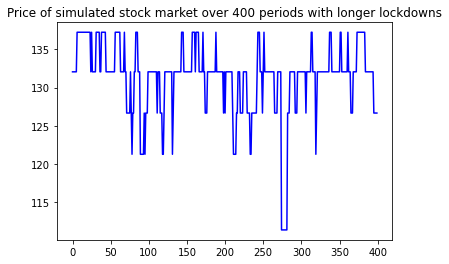

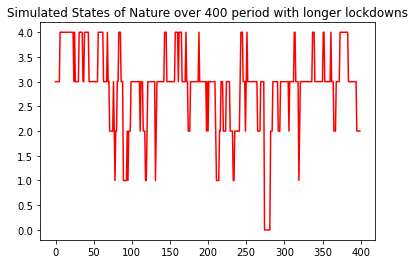

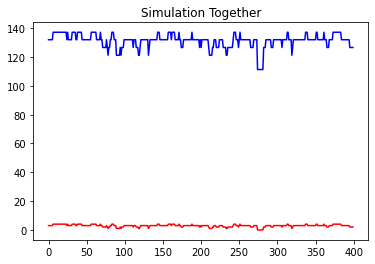

In [141]:
plt.plot(longprices,color = 'blue')
plt.title('Price of simulated stock market over 400 periods with longer lockdowns')
plt.show()
plt.plot(longstates,color = 'red')
plt.title('Simulated States of Nature over 400 period with longer lockdowns')
plt.show()

plt.plot(longprices,color = 'blue')
plt.plot(longstates,color = 'red')
plt.title('Simulation Together')

plt.show()


We can see that the time we did go into lockdown, it did not immediately exit the state in the simulation.

In [142]:
#simulation for just one period of lockdown.
states,stockprices =simulate(M,stocks,400)


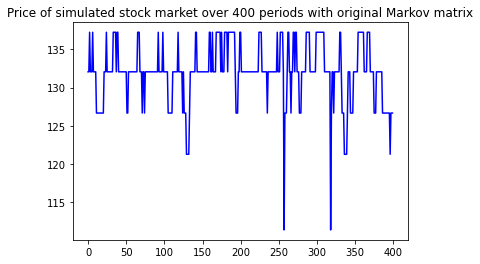

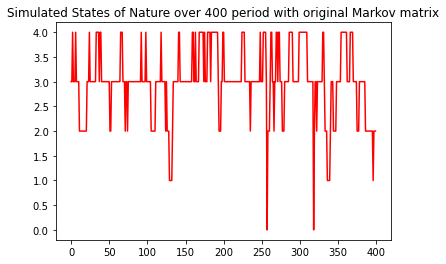

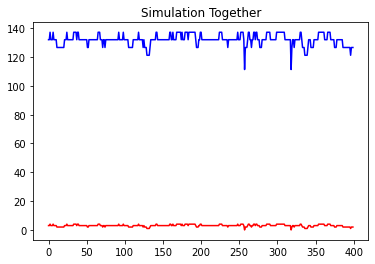

In [127]:
plt.plot(stockprices,color = 'blue')
plt.title('Price of simulated stock market over 400 periods with original Markov matrix')
plt.show()
plt.plot(states,color = 'red')
plt.title('Simulated States of Nature over 400 period with original Markov matrix')
plt.show()

plt.plot(stockprices,color = 'blue')
plt.plot(states,color = 'red')
plt.title('Simulation Together')
plt.show()


## 12. Calculate the welfare loss from a four-period lockdown as the percentage decrease in long-run average consumption, when comparing a four-period lockdown with a one-period one.

If I'm understanding ergodic probabilities and consumption correctly, I can try to find an expected long-run average consumption $X$ with:  $$ E(X) = \pi_1 \times c_1 + ... +\pi_n \times c_n$$
where $\pi_n$ is the long-run probability of being in state $n$ and $c_n$ is the consumption for state $n$.

In [143]:
oneperiod = sum(ergodic(M)*consumption) #long-run average consumption for 1 period exit of lockdown
print(oneperiod)

[0.99987358]


In [144]:
fourperiod = sum(ergodic(Mnew).real*consumption) #long-run average consumption for 4 period exit of lockdown
print(fourperiod)

[0.99901776]


In [149]:
fourperiod-oneperiod

array([-0.00085582])

This gave me a .085 percentage point decrease in long-run average consumption. While considering the size of the United States economy, this decrease can still represent a sizable decrease in consumption even when compared to the giant that is the US GDP. Goldstein and Lee discuss at length what the impact of 1 million COVID deaths would be when viewed in certain perspectives. As calculated in the article, the 1 million COVID deaths could amount to roughly $\$$17.5 trillion in loss of life. The difference between a prolonged lockdown and a much shorter one quarter lockdown becomes much less of an issue when compared to the potential losses from 1 million deaths (As of writing this portion, 493,000 people to date have been reported dead by COVID-related complications in the United States).  
It is undeniable that the one-period lockdown has had an extreme short-run effect on the livelihoods of many people around the world, the long-run average consumption does not seem to fall apart if we were to extend that worst-case scenario lockdown. 